1.3
[1.02535272]
[0.31531786]
[-0.45049318]
[-0.65396604]


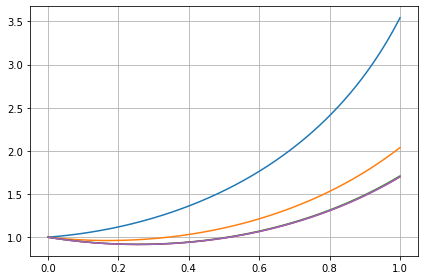

In [1]:
import numpy as np
import matplotlib.pyplot as plt

start = 0.0
finish = 1.0
net_size = 1000
tau = (finish - start) / net_size
a = 1.0
b = 1.3 #здесь задается краевое условие на правом конце 
Y0 = a
Y1 = b
eps = 0.0001 # точность

def calculate_last_y(a):
    x = np.zeros(net_size)
    y = np.zeros(net_size)
    y[0] = Y0
    y[1] = y[0] + a * tau
    for i in range(2, net_size):
        y[i] = tau**2 * np.exp(y[i - 1]) + 2 * y[i - 1] - y[i - 2]
    return y[-1:]

def F(a):
    return calculate_last_y(a) - Y1

def F_derive(a):
    return (F(a + tau) - F(a)) / tau

def paint_plot(a):
    y = np.zeros(net_size)
    y[0] = Y0
    y[1] = y[0] + a * tau
    for i in range(2, net_size):
        y[i] = tau**2 * np.exp(y[i - 1]) + 2 * y[i - 1] - y[i - 2]
    x = np.linspace(start, finish, net_size)
    plt.plot(x, y)
    plt.tight_layout()

def solve_equation_with_edge_conditions():
    a0 = 1.3
    a = a0
    a_next = a - F(a) / F_derive(a)
    while np.abs(a_next - a) > eps:
        print(a)
        a = a_next
        a_next = a - F(a) / F_derive(a)
        paint_plot(a_next)
    plt.grid()
    plt.show()
    
    
solve_equation_with_edge_conditions()